## I. Perkenalan
Nama : Fadhilah Amani Alam Aulia

Batch : 15

Dataset : Data Heart Failure

Objective : Memprediksi `DEATH_EVENT`

Query : SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_015_rmt.heart-failure`

## II. Import Libraries


In [1]:
# Mengimport library yang dibutuhkan

import joblib
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

## III. Data Loading

In [2]:
# Mengakses dataset

data = pd.read_csv('h8dsft_P1G3_fadhilah_amani_alam_aulia.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [3]:
# Menampilkan 10 baris pertama pada dataset

data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [4]:
# Menampilkan 10 baris terakhir pada dataset

data.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [5]:
# Mengganti nama kolom 'sex' menjadi 'gender'

data.rename(columns={'sex': 'gender'}, inplace=True)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [6]:
# Mengecek ukuran dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   gender                    299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<p align='justify'>Berdasarkan data di atas, dapat diketahui bahwa dataset ini terdiri dari 299 baris dan 13 kolom. Dataset ini memiliki data type float64 dan int64 serta memakan memori sebsar 30.5 KB.</p>

## IV. Exploratory Data Analysis (EDA)

In [7]:
# Menampilkan nilai data 'age'

data['age'].unique()

array([42.   , 46.   , 65.   , 53.   , 50.   , 70.   , 60.   , 59.   ,
       72.   , 49.   , 75.   , 57.   , 48.   , 62.   , 52.   , 55.   ,
       58.   , 86.   , 66.   , 80.   , 45.   , 67.   , 90.   , 95.   ,
       63.   , 61.   , 60.667, 40.   , 73.   , 51.   , 82.   , 43.   ,
       85.   , 64.   , 68.   , 54.   , 69.   , 47.   , 44.   , 81.   ,
       87.   , 94.   , 56.   , 41.   , 78.   , 77.   , 79.   ])

In [8]:
# Menampilkan nilai data 'anaemia'

data['anaemia'].unique()

array([1, 0], dtype=int64)

In [9]:
# Menampilkan nilai data 'creatinine_phosphokinase'

data['creatinine_phosphokinase'].unique()

array([ 250,  168,  160,   91,  582,  125,   52,  161,   76,  280,  156,
       1896,   56,  211,   80,  128,  159,  124,  129,  328,  482,  167,
        131,  166, 2522, 1051,  249,  281,  291,  335,   58, 2334,  835,
        972,   81,  572,   88,  618,  892,  235,  260,  144,   68,   96,
        776,  326,  213,   84,  337, 1820,  112,  318,   69,   61,  400,
        719,  151,  101, 2281,  720, 1185,  207,  655,  336,  233,  244,
        855,   53,  358, 1202,  615,  588,   92,   59,  143,  102,  113,
        200,   62,  675,  157, 2060, 3964,  427,  246,  212,  146,  111,
        553,  789,  364,   47,   66,  115, 1199,  231, 1380,  577, 7702,
        110,  154,  514,  305,  898,  369,  646,  943,  176,  395,  145,
         57, 2017,  258,  981,   70, 2656,  371, 5209,  248, 1548,  185,
        132, 2442,  478,  104,  232,  191,  257,   64,  123,  220,   75,
        109, 5882, 1876,  292,   60,  270, 4540, 2261, 1846,  130,  198,
       1211,  135, 1021,   86, 2794,   93,   90,  6

In [10]:
# Menampilkan nilai data 'diabetes'

data['diabetes'].unique()

array([1, 0], dtype=int64)

In [11]:
# Menampilkan nilai data 'ejection_fraction'

data['ejection_fraction'].unique()

array([15, 17, 20, 25, 30, 35, 38, 40, 45, 50, 55, 60, 62, 65, 70, 80, 14],
      dtype=int64)

In [12]:
# Menampilkan nilai data 'high_blood_pressure'

data['high_blood_pressure'].unique()

array([0, 1], dtype=int64)

In [13]:
# Menampilkan nilai data 'platelets'

data['platelets'].unique()

array([213000.  , 271000.  , 327000.  , 418000.  , 279000.  , 237000.  ,
       276000.  , 244000.  , 196000.  , 302000.  , 318000.  , 365000.  ,
       274000.  , 427000.  , 297000.  , 263358.03, 153000.  , 395000.  ,
       621000.  , 127000.  , 329000.  , 259000.  ,  62000.  , 404000.  ,
       232000.  , 319000.  , 221000.  , 348000.  , 235000.  , 277000.  ,
        75000.  , 305000.  , 268000.  , 371000.  , 533000.  , 231000.  ,
       236000.  , 255000.  , 162000.  , 228000.  , 192000.  , 294000.  ,
       215000.  , 422000.  , 451000.  , 390000.  , 270000.  , 216000.  ,
       293000.  , 164000.  , 229000.  , 201000.  , 226000.  , 283000.  ,
       257000.  , 220000.  , 223000.  , 324000.  , 275000.  , 362000.  ,
       321000.  , 351000.  , 286000.  , 132000.  , 358000.  ,  87000.  ,
       543000.  , 222000.  , 194000.  , 317000.  , 507000.  , 203000.  ,
       300000.  , 172000.  , 309000.  , 265000.  , 208000.  , 742000.  ,
       151000.  , 166000.  , 389000.  , 210000.  , 

In [14]:
# Menampilkan nilai data 'serum_creatinine'

data['serum_creatinine'].unique()

array([1.3 , 2.1 , 2.7 , 1.4 , 1.  , 1.2 , 2.5 , 5.  , 1.6 , 1.83, 1.7 ,
       0.9 , 0.8 , 0.5 , 0.7 , 1.1 , 3.  , 2.2 , 0.75, 1.18, 2.3 , 0.6 ,
       1.9 , 3.2 , 1.5 , 6.8 , 9.  , 4.4 , 2.9 , 2.4 , 3.5 , 2.  , 3.8 ,
       9.4 , 3.4 , 1.8 , 4.  , 5.8 , 3.7 , 6.1 ])

In [15]:
# Menampilkan nilai data 'serum_sodium'

data['serum_sodium'].unique()

array([136, 124, 116, 139, 134, 140, 137, 142, 132, 141, 144, 130, 138,
       145, 127, 128, 133, 143, 135, 131, 121, 125, 146, 129, 113, 126,
       148], dtype=int64)

In [16]:
# Menampilkan nilai data 'gender'

data['gender'].unique()

array([0, 1], dtype=int64)

In [17]:
# Menampilkan nilai data 'smoking'

data['smoking'].unique()

array([0, 1], dtype=int64)

In [18]:
# Menampilkan nilai data 'time'

data['time'].unique()

array([ 65, 100,   8,  43, 186,  15,  16,  66,  77,  78,  85, 172, 207,
        12,  20,  23,  29,  32,  42,  88,  95, 109, 193, 214, 246,  28,
       108, 120, 126, 145, 187, 197, 212, 215, 245, 256,  30,  45,  83,
       130, 185, 220, 244, 271,  24,  60,  75,  86,  91, 107, 110, 140,
       210, 213, 233,  74, 115, 174,  44,  87,  97, 147, 196, 250, 257,
        33,  82,  90,  94, 104, 205, 237, 278,  10,  63,  14, 188,   4,
         7,  31,  41,  55,  59,  64,  73, 135, 146, 180, 198, 241,  38,
        67,  79, 111, 150, 154, 170, 201, 230, 235,  11,  26,  50, 112,
       113, 129, 148, 171, 216,  54,  61,  71,  72, 105, 119, 121, 194,
       195, 206, 208, 209, 240, 258, 270,   6,  27,  35,  40, 162, 280,
        68,  96, 123, 175, 247,  80, 118, 211, 285,  13,  76, 192, 200,
       231,  22, 106, 117, 134], dtype=int64)

In [19]:
# Menampilkan nilai data 'DEATH_EVENT'

data['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

Pada dataset ini, data-data kategorik telah diubah menjadi numerik. Berikut ini merupakan penjelasan untuk data kategorik:
- Kolom `gender`:
<br>
(0) Female <br>
(1) Male
- Kolom `anaemia`:
<br>
(0) No <br>
(1) Yes
- Kolom `diabetes`:
<br>
(0) No <br>
(1) Yes
- Kolom `high_blood_pressure`:
<br>
(0) No <br>
(1) Yes
- Kolom `smoking`:
<br>
(0) No <br>
(1) Yes
- Kolom `DEATH_EVENT`:
<br>
(0) No <br>
(1) Yes

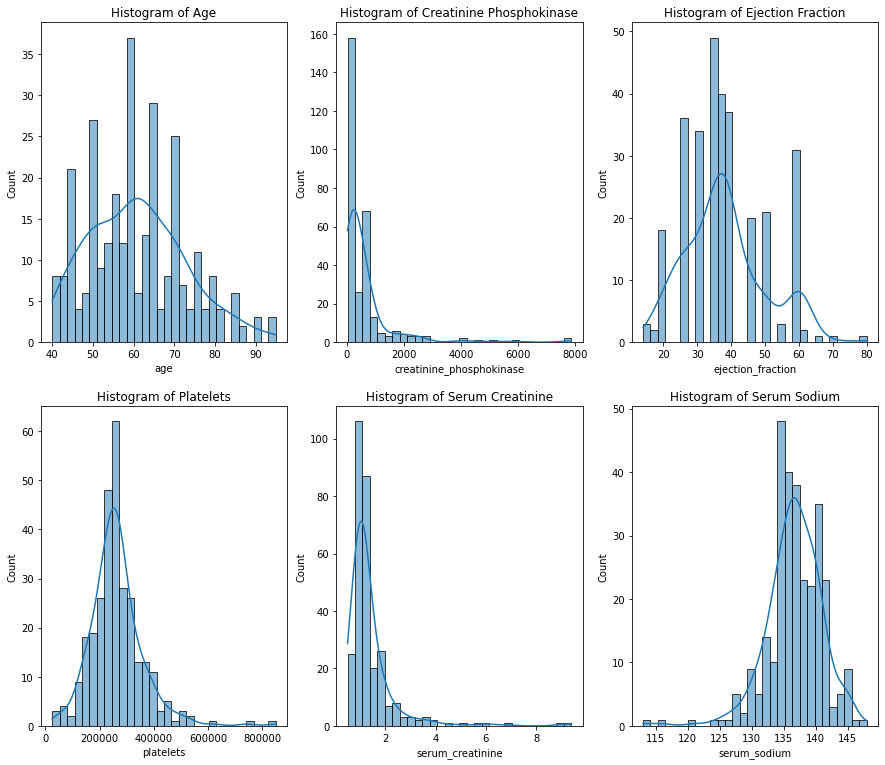

In [20]:
# Membuat grafik histogram

plt.figure(figsize=(15,20))

plt.subplot(3,3,1)
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Histogram of Age')

plt.subplot(3,3,2)
sns.histplot(data['creatinine_phosphokinase'], bins=30, kde=True)
plt.title('Histogram of Creatinine Phosphokinase')

plt.subplot(3,3,3)
sns.histplot(data['ejection_fraction'], bins=30, kde=True)
plt.title('Histogram of Ejection Fraction')

plt.subplot(3,3,4)
sns.histplot(data['platelets'], bins=30, kde=True)
plt.title('Histogram of Platelets')

plt.subplot(3,3,5)
sns.histplot(data['serum_creatinine'], bins=30, kde=True)
plt.title('Histogram of Serum Creatinine')

plt.subplot(3,3,6)
sns.histplot(data['serum_sodium'], bins=30, kde=True)
plt.title('Histogram of Serum Sodium')

plt.show()

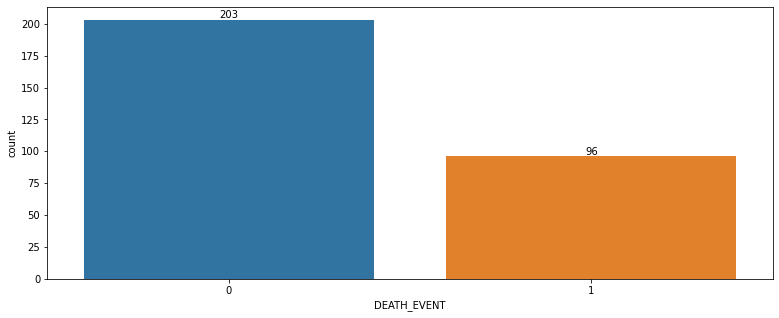

In [21]:
# Visualisasi data untuk kolom kategori

plt.figure(figsize = (13,5))
ax = sns.countplot(x='DEATH_EVENT', data=data)
ax.bar_label(ax.containers[0])
plt.show()


Berdasarkan grafik di atas, dapat diketahui bahwa terdapat 203 data dengan kategori 'no' pada DEATH_EVENT dan 96 data dengan kategori 'yes' pada DEATH_EVENT.

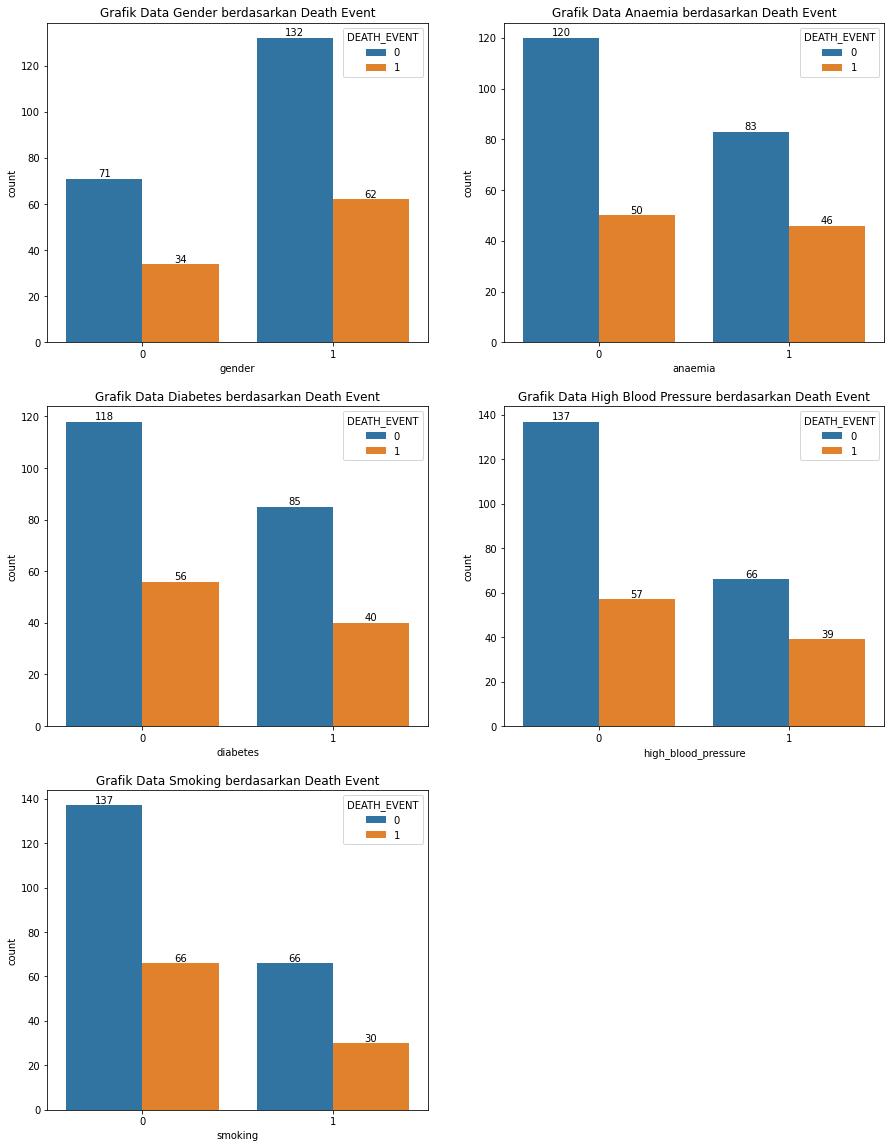

In [22]:
# Membuat grafik countplot

plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
ax = sns.countplot(x='gender', hue='DEATH_EVENT', data=data)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Grafik Data Gender berdasarkan Death Event')

plt.subplot(3,2,2)
ax = sns.countplot(x='anaemia', hue='DEATH_EVENT', data=data)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Grafik Data Anaemia berdasarkan Death Event')

plt.subplot(3,2,3)
ax = sns.countplot(x='diabetes', hue='DEATH_EVENT', data=data)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Grafik Data Diabetes berdasarkan Death Event')

plt.subplot(3,2,4)
ax = sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=data)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Grafik Data High Blood Pressure berdasarkan Death Event')

plt.subplot(3,2,5)
ax = sns.countplot(x='smoking', hue='DEATH_EVENT', data=data)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Grafik Data Smoking berdasarkan Death Event')
plt.show()

Berdasarkan grafik di atas, dapat diketahui bahwa:
- Pada variable 'gender', pada jenis kelamin laki-laki terdapat 132 pasien yang selamat dan 62 pasien yang meninggal karena gagal jantung. Sedangkan pada jenis kelamin perempuan, terdapat 71 pasien yang selamat dan 34 pasien yang meninggal karena gagal jantung.
- Pada variable 'anaemia', pada pasien yang tidak mengidap anaemia, terdapat 120 pasien yang selamat dan 50 pasien yang meninggal karena gagal jantung. Sedangkan pada pengidap anaemia, terdapat 83 pasien yang selamat dan 46 pasien yang meninggal karena gagal jantung.
- Pada variable 'diabetes', pada pasien yang tidak mengidap diabetes, terdapat 118 pasien yang selamat dan 56 pasien yang meninggal karena gagal jantung. Sedangkan pada pengidap diabetes, terdapat 85 pasien yang selamat dan 40 pasien yang meninggal karena gagal jantung.
- Pada variable 'high blood pressure', pada pasien yang tidak terkena darah tinggi, terdapat 137 pasien yang selamat dan 57 pasien yang meninggal karena gagal jantung. Sedangkan pada pasien yang mempunyai tekanan darah tinggi, terdapat 66 pasien yang selamat dan 39 pasien yang meninggal karena gagal jantung.
- Pada variable 'smoking', pada pasien yang tidak merokok, terdapat 137 pasien yang selamat dan 66 pasien yang meninggal karena gagal jantung. Sedangkan pada pasien yang merokok, terdapat 66 pasien yang selamat dan 30 pasien yang meninggal karena gagal jantung.

In [23]:
# Melihat describe data

data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:>

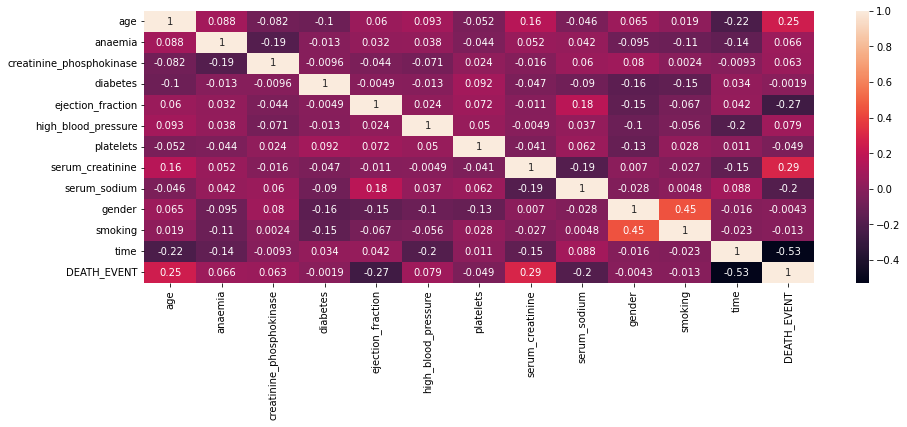

In [24]:
# Pembuatan heatmap untuk melihat korelasi antar variable

plt.figure(figsize = (15, 5))
sns.heatmap(data.corr(), annot = True)

Berdasarkan heatmap di atas, diketahui bahwa urutan variabel yang memiliki korelasi tinggi dengan DEATH_EVENT adalah:
- time, dengan nilai 0.53
- serum_creatinine, dengan nilai 0.29
- ejection_fraction, dengan nilai 0.27
- age, dengan nilai 0.25
- serum_sodium, dengan nilai 0.2
- high_blood_pressure, dengan nilai 0.079
- anaemia, dengan nilai 0.066
- creatinine_phosphokinase, dengan nilai 0.063
- platelets, dengan nilai 0.049
- smoking, dengan nilai 0.013
- gender, dengan nilai 0.0043
- diabetes, dengan nilai 0.0019


## V. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model. Data Preprocessing yang dilakukan adalah:
1. Get data for model inference
2. Split between X (features) dan y (target)
3. Data Outlier
4. Missing Values
5. Feature Selection
6. Split between Numerical Columns and Categorical Columns
7. Feature Scaling
8. Concate the Numerical Columns and Categorical Columns

### V.1 Get Data for Model Inference

In [25]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state = 17)
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
121,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
94,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
138,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
288,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
139,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
13,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
230,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
165,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
58,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
122,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


In [27]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [28]:
# Reset Index

data_train_test.reset_index(drop = True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
1,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
2,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
3,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
4,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
5,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
6,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
8,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
9,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


### V.2 Split between 'X' (features) and 'y' (target)

In [29]:
# Split between 'X' (features) and 'y' (target)

X = data_train_test.drop('DEATH_EVENT', axis=1)
y = data_train_test['DEATH_EVENT']
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186
...,...,...,...,...,...,...,...,...,...,...,...,...
284,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147
285,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186
286,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186
287,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215


In [30]:
# Split antara Train-Set dan Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

print('Train Size   : ', X_train.shape)
print('Test Size    : ', X_test.shape )

Train Size   :  (231, 12)
Test Size    :  (58, 12)


### V.3 Data Outlier

In [31]:
# Membuat fungsi untuk pembuatan histogram dan boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

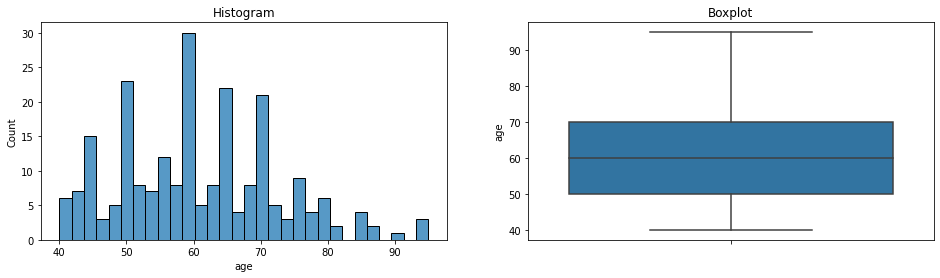


Skewness Value :  0.3947448943763502


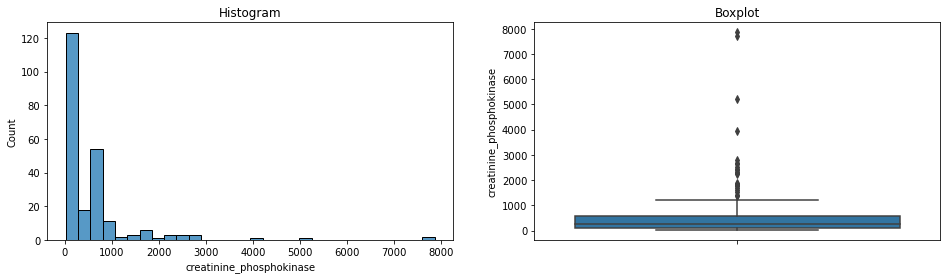


Skewness Value :  4.79807430370201


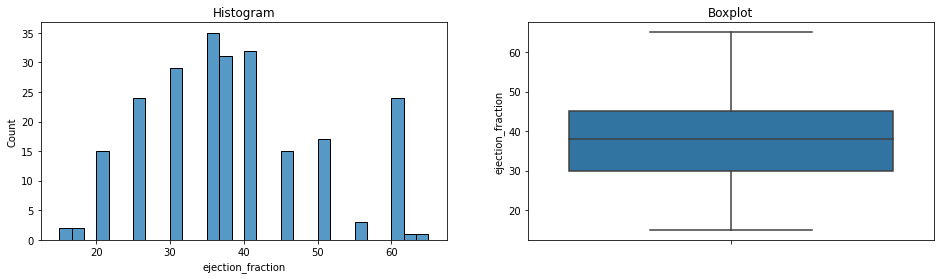


Skewness Value :  0.41335154621352377


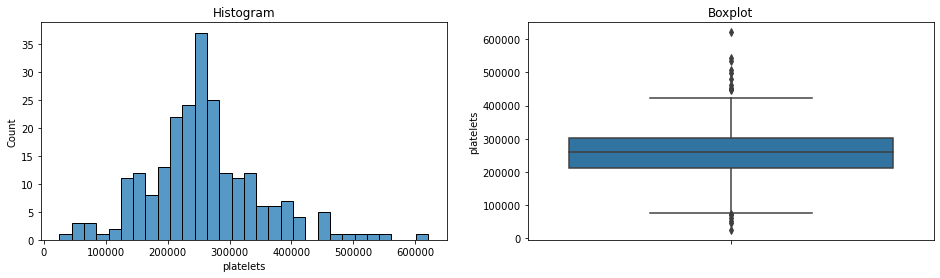


Skewness Value :  0.5814913467412631


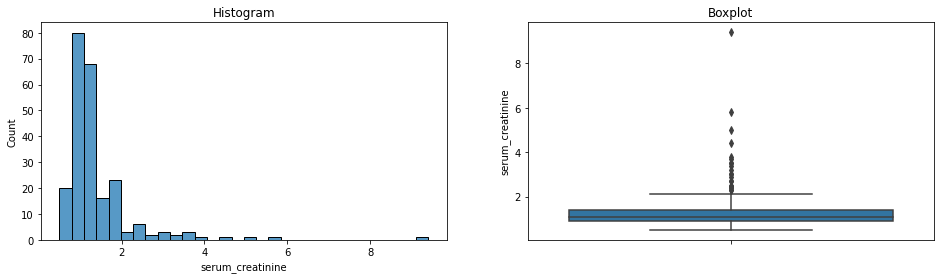


Skewness Value :  4.557682023825841


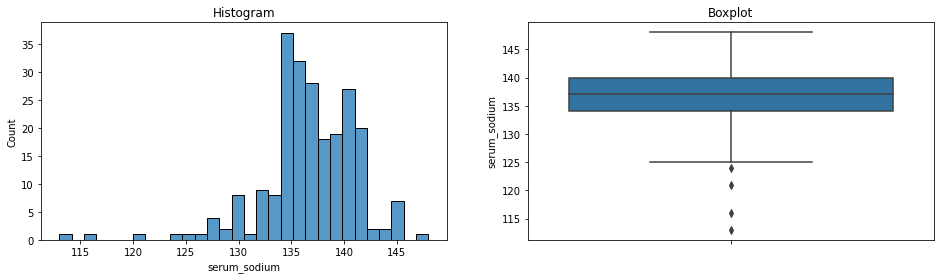


Skewness Value :  -1.28501124181473


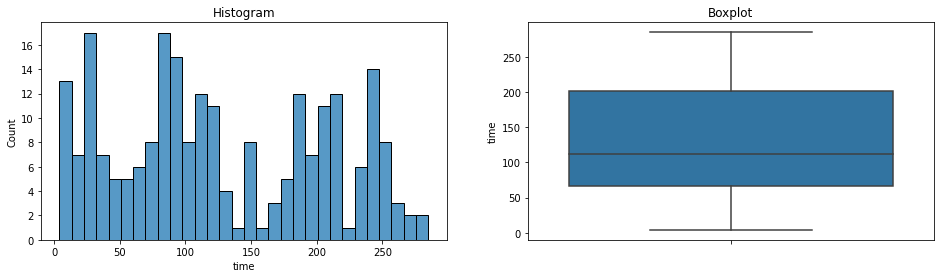


Skewness Value :  0.1739820942162446


In [32]:
# Mengecek apakah terdapat data outlier

diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

diagnostic_plots(X_train, 'creatinine_phosphokinase')
print('\nSkewness Value : ', X_train['creatinine_phosphokinase'].skew())

diagnostic_plots(X_train, 'ejection_fraction')
print('\nSkewness Value : ', X_train['ejection_fraction'].skew())

diagnostic_plots(X_train, 'platelets')
print('\nSkewness Value : ', X_train['platelets'].skew())

diagnostic_plots(X_train, 'serum_creatinine')
print('\nSkewness Value : ', X_train['serum_creatinine'].skew())

diagnostic_plots(X_train, 'serum_sodium')
print('\nSkewness Value : ', X_train['serum_sodium'].skew())

diagnostic_plots(X_train, 'time')
print('\nSkewness Value : ', X_train['time'].skew())

Data outlier pada dataset ini akan dibiarkan, karena data-data tersebut merupakan data natural/alamiah dari dataset, bukan data yang menjadi outlier karena kesahan input data.

### V.4 Missing Values

In [33]:
# Mengecek jumlah missing value pada X_train

X_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
gender                      0
smoking                     0
time                        0
dtype: int64

In [34]:
# Mengecek jumlah missing value pada X_test

X_test.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
gender                      0
smoking                     0
time                        0
dtype: int64

In [35]:
# Mengecek jumlah missing value pada y_train

y_train.isnull().sum()

0

In [36]:
# Mengecek jumlah missing value pada y_test

y_test.isnull().sum()

0

Berdasarkan pengecekan yang telah dilakukan, dapat diketahui bahwa tidak ada missing value pada dataset ini.

### V.5 Feature Selection

In [37]:
# Menampilkan data X_train

X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time
189,40.0,1,129,0,35,0,255000.0,0.9,137,1,0,209
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65
279,64.0,0,1610,0,60,0,242000.0,1.0,137,1,0,113
109,80.0,1,553,0,20,1,140000.0,4.4,133,1,0,41
82,48.0,1,582,1,55,0,87000.0,1.9,121,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
278,53.0,1,1808,0,60,1,249000.0,0.7,138,1,1,106
240,50.0,1,54,0,40,0,279000.0,0.8,141,1,0,250
143,45.0,1,981,0,30,0,136000.0,1.1,137,1,0,11
241,55.0,1,170,1,40,0,336000.0,1.2,135,1,0,250


Fitur-fitur yang akan dipilih adalah fitur yang memiliki nilai korelasi yang tinggi dengan DEATH_EVENT. Fitur-fitur tersebut adalah:
- age
- anaemia
- creatinine_phosphokinase
- ejection_fraction
- high_blood_pressure
- serum_creatinine
- serum_sodium
- time

Maka kolom platelets, smoking, gender, dan diabetes akan dihapus.

In [38]:
# Menghapus kolom-kolom yang tidak digunakan pada X_train

X_train = X_train[['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'time']]
X_train

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time
189,40.0,1,129,35,0,0.9,137,209
0,42.0,1,250,15,0,1.3,136,65
279,64.0,0,1610,60,0,1.0,137,113
109,80.0,1,553,20,1,4.4,133,41
82,48.0,1,582,55,0,1.9,121,15
...,...,...,...,...,...,...,...,...
278,53.0,1,1808,60,1,0.7,138,106
240,50.0,1,54,40,0,0.8,141,250
143,45.0,1,981,30,0,1.1,137,11
241,55.0,1,170,40,0,1.2,135,250


In [39]:
# Menghapus kolom-kolom yang tidak digunakan pada X_test

X_test = X_test[['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'time']]
X_test

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time
139,55.0,0,2017,25,0,1.10,138,214
154,40.0,0,478,30,0,0.90,136,148
81,70.0,0,1202,50,1,0.90,141,196
122,72.0,1,110,25,0,1.00,140,65
125,60.0,1,154,25,0,1.70,135,82
71,55.0,0,336,45,1,0.90,140,74
37,55.0,0,572,35,0,0.80,143,215
28,62.0,0,281,35,0,1.00,136,108
13,49.0,1,80,30,1,1.00,138,12
11,60.0,0,1896,25,0,2.10,144,172


### V.6 Split between Numerical Columns and Categorical Columns 

In [40]:
# Mendapatkan kolom numerikan dan kolom kategorikal

num_columns = X_train[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']].columns.tolist()
cat_columns = X_train[['anaemia', 'high_blood_pressure']].columns.tolist()

print('Numerical Columns di X_train   : ', num_columns)
print('\nCategorical Columns di X_train : ', cat_columns)

num_columns1 = X_test[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']].columns.tolist()
cat_columns1 = X_test[['anaemia', 'high_blood_pressure']].columns.tolist()

print('\nNumerical Columns di X_test    : ', num_columns1)
print('\nCategorical Columns di X_test  : ', cat_columns1)

Numerical Columns di X_train   :  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

Categorical Columns di X_train :  ['anaemia', 'high_blood_pressure']

Numerical Columns di X_test    :  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

Categorical Columns di X_test  :  ['anaemia', 'high_blood_pressure']


In [41]:
# Memisahkan Train-set dan Test-set berdasarkan tipe kolom

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_test_num

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time
139,55.0,2017,25,1.10,138,214
154,40.0,478,30,0.90,136,148
81,70.0,1202,50,0.90,141,196
122,72.0,110,25,1.00,140,65
125,60.0,154,25,1.70,135,82
71,55.0,336,45,0.90,140,74
37,55.0,572,35,0.80,143,215
28,62.0,281,35,1.00,136,108
13,49.0,80,30,1.00,138,12
11,60.0,1896,25,2.10,144,172


### V.7 Feature Scaling
Pada bagian ini akan dilakukan scaling untuk kolom numerik. Scaling yang akan digunakan adalah MinMaxScaler, karena MinMaxScaler mempertahankan bentuk distribusi data aslinya. MinMaxScaler akan mengubah data berada di rentang 0 sampai 1.

In [42]:
# Feature Scaling menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.        , 0.01352386, 0.4       , 0.04494382, 0.68571429,
        0.72953737],
       [0.03636364, 0.02896147, 0.        , 0.08988764, 0.65714286,
        0.21708185],
       [0.43636364, 0.20247512, 0.9       , 0.05617978, 0.68571429,
        0.38790036],
       ...,
       [0.09090909, 0.12222506, 0.3       , 0.06741573, 0.68571429,
        0.02491103],
       [0.27272727, 0.01875478, 0.5       , 0.07865169, 0.62857143,
        0.87544484],
       [0.58181818, 0.043506  , 0.1       , 0.08988764, 0.65714286,
        0.19572954]])

### V.8 Menggabungkan Kolom Numerikal dengan Kolom Kategorikal

In [43]:
# Menggabungkan kolom numerikal dan kategorikal

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)
X_train_final

array([[0.        , 0.01352386, 0.4       , ..., 0.72953737, 1.        ,
        0.        ],
       [0.03636364, 0.02896147, 0.        , ..., 0.21708185, 1.        ,
        0.        ],
       [0.43636364, 0.20247512, 0.9       , ..., 0.38790036, 0.        ,
        0.        ],
       ...,
       [0.09090909, 0.12222506, 0.3       , ..., 0.02491103, 1.        ,
        0.        ],
       [0.27272727, 0.01875478, 0.5       , ..., 0.87544484, 1.        ,
        0.        ],
       [0.58181818, 0.043506  , 0.1       , ..., 0.19572954, 0.        ,
        1.        ]])

In [44]:
# Membuat dataframe baru, X_train_final_df

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure
0,0.000000,0.013524,0.4,0.044944,0.685714,0.729537,1.0,0.0
1,0.036364,0.028961,0.0,0.089888,0.657143,0.217082,1.0,0.0
2,0.436364,0.202475,0.9,0.056180,0.685714,0.387900,0.0,0.0
3,0.727273,0.067619,0.1,0.438202,0.571429,0.131673,1.0,1.0
4,0.145455,0.071319,0.8,0.157303,0.228571,0.039146,1.0,0.0
...,...,...,...,...,...,...,...,...
226,0.236364,0.227737,0.9,0.022472,0.714286,0.362989,1.0,1.0
227,0.181818,0.003955,0.5,0.033708,0.800000,0.875445,1.0,0.0
228,0.090909,0.122225,0.3,0.067416,0.685714,0.024911,1.0,0.0
229,0.272727,0.018755,0.5,0.078652,0.628571,0.875445,1.0,0.0


In [45]:
# Membuat dataframe baru, X_test_final_df

X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + cat_columns])
X_test_final_df

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure
0,0.272727,0.254402,0.20,0.067416,0.714286,0.747331,0.0,0.0
1,0.000000,0.058051,0.30,0.044944,0.657143,0.512456,0.0,0.0
2,0.545455,0.150421,0.70,0.044944,0.800000,0.683274,0.0,1.0
3,0.581818,0.011100,0.20,0.056180,0.771429,0.217082,1.0,0.0
4,0.363636,0.016713,0.20,0.134831,0.628571,0.277580,1.0,0.0
5,0.272727,0.039934,0.60,0.044944,0.771429,0.249110,0.0,1.0
6,0.272727,0.070043,0.40,0.033708,0.857143,0.750890,0.0,0.0
7,0.400000,0.032917,0.40,0.056180,0.657143,0.370107,0.0,0.0
8,0.163636,0.007272,0.30,0.056180,0.714286,0.028470,1.0,1.0
9,0.363636,0.238964,0.20,0.179775,0.885714,0.597865,0.0,0.0


## VI. Model Definition
Bagian ini berisi cell untuk mendefinisikan model. Terdapat 2 model yang akan dipakai, yaitu:
- Random Forest
- Bagging Classifier

---
## 1. Random Forest

## VI.1 Model Definition
Pada bagian ini model yang akan digunakan adalah Random Forest Classifier. Alasan menggunakan model ini adalah karena model ini dapat digunakan untuk pengklasifikasian dataset dalam jumlah besar dan dapat digunakan untuk banyak dimensi dengan berbagai skala dan performa yang tinggi. Lalu hyperparameter yang digunakan adalah n_estimators, min_sample_leaf, dan random_state. N_estimators digunakan untuk menunjukkan banyaknya tree dalam diagram, semakin banyak jumlah estimator maka semakin bagus. Min_sample_leaf adalah jumlah minimum sample yang dibutuhkan di leaf node, sedangkan random_state digunakan agar data random yang digunakan tidak berubah-ubah.

In [46]:
# Definisi model yang digunakan

model_RF = RandomForestClassifier(n_estimators=10, min_samples_leaf=2, random_state=5)

## VII.1 Model Training
Pada bagian ini model akan dilakukan training dengan hyperparamter yang telah didefinisikan.

In [47]:
# Melakukan model training

model_RF.fit(X_train_final, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=10, random_state=5)

## VIII.1 Model Evaluation
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

In [48]:
# Melakukan prediksi pada train-set dan test-set dengan Random Forest

y_pred_train = model_RF.predict(X_train_final)
y_pred_test = model_RF.predict(X_test_final)

#Data y_pred_train

y_pred_train

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [49]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ', accuracy_score(y_train,y_pred_train))
print('accuracy score test : ', accuracy_score(y_test,y_pred_test))

accuracy score train :  0.974025974025974
accuracy score test :  0.8275862068965517


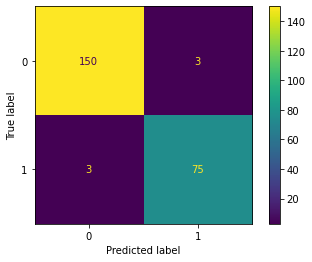

In [50]:
# Menampilkan confusion matrix untuk data train

cm = confusion_matrix(y_train, y_pred_train, labels=model_RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_RF.classes_)

disp.plot()
plt.show()

In [51]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       153
           1       0.96      0.96      0.96        78

    accuracy                           0.97       231
   macro avg       0.97      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231



Berdasarkan confusion matrix dan classification report pada data train:
- Precision<br>
    - Model Random Forest berhasil memprediksi sebanyak 98% atau 150 data yang ada pada kelas 0, yaitu kategori 'no' pada death_event dengan benar, dan 2% atau sebanyak 3 data salah prediksi. Data diprediksi oleh model dan masuk ke kelas 0, padahal data tersebut seharusnya masuk ke ke kelas 1, yaitu kategori 'yes' pada death_event.
    - Lalu model random forest juga berhasil memprediksi sebanyak 96% atau 75 data yang ada pada kelas 1, yaitu kategori 'yes' pada death_event dengan benar, dan 4% atau sebanyak 3 data salah prediksi. Data diprediksi oleh model dan masuk ke kelas 1, padahal data tersebut seharusnya masuk ke ke kelas 0, yaitu kategori 'no' pada death_event.
- Recall
    - Model Random Forest berhasil memprediksi sebanyak 98% atau 150 data yang ada pada kelas 0, yaitu kategori 'no' pada death_event dengan benar, dan 2% atau sebanyak 3 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'yes' pada death_event.
    - Lalu Model Random Forest juga berhasil memprediksi sebanyak 96% atau 75 data yang ada pada kelas 1, yaitu kategori 'yes' pada death_event dengan benar, dan 4% atau sebanyak 3 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'no' pada death_event.

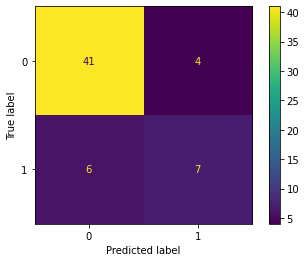

In [55]:
# Menampilkan confusion matrix untuk data test

cm = confusion_matrix(y_test, y_pred_test, labels=model_RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_RF.classes_)

disp.plot()
plt.show()

In [56]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        45
           1       0.64      0.54      0.58        13

    accuracy                           0.83        58
   macro avg       0.75      0.72      0.74        58
weighted avg       0.82      0.83      0.82        58



Berdasarkan confusion matrix dan classification report pada data test:
- Precision<br>
    - Model Random Forest berhasil memprediksi sebanyak 87% atau 41 data yang ada pada kelas 0, yaitu kategori 'no' pada death_event dengan benar, dan 13% atau sebanyak 4 data salah prediksi. Data diprediksi oleh model dan masuk ke kelas 0, padahal data tersebut seharusnya masuk ke ke kelas 1, yaitu kategori 'yes' pada death_event.
    - Lalu model random forest juga berhasil memprediksi sebanyak 64% atau 7 data yang ada pada kelas 1, yaitu kategori 'yes' pada death_event dengan benar, dan 36% atau sebanyak 6 data salah prediksi. Data diprediksi oleh model dan masuk ke kelas 1, padahal data tersebut seharusnya masuk ke ke kelas 0, yaitu kategori 'no' pada death_event.
- Recall
    - Model Random Forest berhasil memprediksi sebanyak 91% atau 41 data yang ada pada kelas 0, yaitu kategori 'no' pada death_event dengan benar, dan 9% atau sebanyak 4 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'yes' pada death_event.
    - Lalu Model Random Forest juga berhasil memprediksi sebanyak 54% atau 7 data yang ada pada kelas 1, yaitu kategori 'yes' pada death_event dengan benar, dan 46% atau sebanyak 6 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'no' pada death_event.

In [54]:
# Menampilkan nilai feature importance pada setiap feature

pd.DataFrame(index=X_train_final_df.columns,data=model_RF.feature_importances_,columns=['Feature Importance'])

,Feature Importance
age,0.131167
creatinine_phosphokinase,0.065177
ejection_fraction,0.127672
serum_creatinine,0.149496
serum_sodium,0.079164
time,0.415209
anaemia,0.015956
high_blood_pressure,0.016159


---
## 2. Bagging Classifier

## VI.2 Model Definition
Pada bagian ini model yang akan digunakan adalah Bagging Classifier. Alasan menggunakan model ini adalah karena model ini dapat dibuat menggunakan beberapa estimator yang dapat dilatih menggunakan teknik sampling yang berbeda. Lalu hyperparameter yang digunakan adalah n_estimators dan random_state. N_estimators digunakan untuk menunjukkan banyaknya tree dalam diagram, semakin banyak jumlah estimator maka semakin bagus, sedangkan random_state digunakan agar data random yang digunakan tidak berubah-ubah.

In [57]:
# Definisi model yang digunakan

model_BC = BaggingClassifier(n_estimators= 10, random_state=5)

## VII.2 Model Training

In [58]:
# Melakukan model training Bagging Classifier

model_BC.fit(X_train_final,y_train)

BaggingClassifier(random_state=5)

## VIII.2 Model Evaluation

In [59]:
# Melakukan prediksi pada train-set dan test-set dengan Random Forest

y_pred_train1 = model_BC.predict(X_train_final)
y_pred_test1 = model_BC.predict(X_test_final)

#Data y_pred_train

y_pred_train1

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [60]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ', accuracy_score(y_train,y_pred_train1))
print('accuracy score test : ', accuracy_score(y_test,y_pred_test1))

accuracy score train :  0.9913419913419913
accuracy score test :  0.7586206896551724


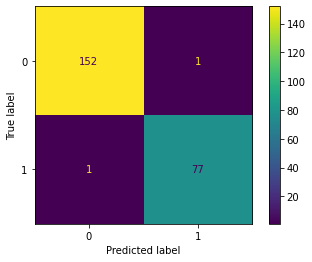

In [61]:
# Menampilkan confusion matrix untuk data test

cm = confusion_matrix(y_train, y_pred_train1, labels=model_BC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_BC.classes_)

disp.plot()
plt.show()

In [62]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.99      0.99      0.99        78

    accuracy                           0.99       231
   macro avg       0.99      0.99      0.99       231
weighted avg       0.99      0.99      0.99       231



Berdasarkan confusion matrix dan classification report pada data train:
- Precision<br>
    - Model Bagging Classifier berhasil memprediksi sebanyak 99% atau 152 data yang ada pada kelas 0, yaitu kategori 'no' pada death_event dengan benar, dan 1% atau sebanyak 1 data salah prediksi. Data diprediksi oleh model dan masuk ke kelas 0, padahal data tersebut seharusnya masuk ke ke kelas 1, yaitu kategori 'yes' pada death_event.
    - Lalu model bagging classifer juga berhasil memprediksi sebanyak 99% atau 77 data yang ada pada kelas 1, yaitu kategori 'yes' pada death_event dengan benar, dan 1% atau sebanyak 1 data salah prediksi. Data diprediksi oleh model dan masuk ke kelas 1, padahal data tersebut seharusnya masuk ke ke kelas 0, yaitu kategori 'no' pada death_event.
- Recall
    - Model Bagging Classifer berhasil memprediksi sebanyak 99% atau 152 data yang ada pada kelas 0, yaitu kategori 'no' pada death_event dengan benar, dan 1% atau sebanyak 1 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'yes' pada death_event.
    - Lalu Model Bagging Classifer juga berhasil memprediksi sebanyak 99% atau 77 data yang ada pada kelas 1, yaitu kategori 'yes' pada death_event dengan benar, dan 1% atau sebanyak 1 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'no' pada death_event.

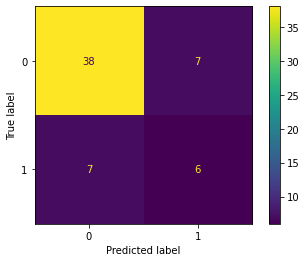

In [154]:
# Menampilkan confusion matrix untuk data test

cm = confusion_matrix(y_test, y_pred_test1, labels=model_BC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_BC.classes_)

disp.plot()
plt.show()

In [151]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        45
           1       0.46      0.46      0.46        13

    accuracy                           0.76        58
   macro avg       0.65      0.65      0.65        58
weighted avg       0.76      0.76      0.76        58



Berdasarkan confusion matrix dan classification report pada data test:
- Precision<br>
    - Model Bagging Classifier berhasil memprediksi sebanyak 84% atau 38 data yang ada pada kelas 0, yaitu kategori 'no' pada death_event dengan benar, dan 16% atau sebanyak 7 data salah prediksi. Data diprediksi oleh model dan masuk ke kelas 0, padahal data tersebut seharusnya masuk ke ke kelas 1, yaitu kategori 'yes' pada death_event.
    - Lalu model bagging classifier juga berhasil memprediksi sebanyak 46% atau 6 data yang ada pada kelas 1, yaitu kategori 'yes' pada death_event dengan benar, dan 54% atau sebanyak 7 data salah prediksi. Data diprediksi oleh model dan masuk ke kelas 1, padahal data tersebut seharusnya masuk ke ke kelas 0, yaitu kategori 'no' pada death_event.
- Recall
    - Model bagging classifer berhasil memprediksi sebanyak 84% atau 38 data yang ada pada kelas 0, yaitu kategori 'no' pada death_event dengan benar, dan 16% atau sebanyak 7 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'yes' pada death_event.
    - Lalu Model bagging classifier juga berhasil memprediksi sebanyak 46% atau 6 data yang ada pada kelas 1, yaitu kategori 'yes' pada death_event dengan benar, dan 54% atau sebanyak 7 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'no' pada death_event.

---

In [63]:
# Save file untuk data inference

with open('model_RF.pkl', 'wb') as file_1:
    joblib.dump(model_RF, file_1)

with open('model_BC.pkl', 'wb') as file_2:
    joblib.dump(model_BC, file_2)
    
with open('model_scaler.pkl', 'wb') as file_3:
    joblib.dump(scaler, file_3)

with open('list_num_cols.txt', 'w') as file_4:
    json.dump(num_columns, file_4)

with open('list_cat_columns.txt', 'w') as file_5:
    json.dump(cat_columns, file_5)

## IX. Model Inference

In [64]:
# Mengakses file yang telah di-save untuk data inference

with open('model_RF.pkl', 'rb') as file_1:
    model_RF = joblib.load(file_1)

with open('model_BC.pkl', 'rb') as file_2:
    model_BC = joblib.load(file_2)

with open('model_scaler.pkl', 'rb') as file_3:
    model_scaler = joblib.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
    list_num_cols = json.load(file_4)

with open('list_cat_columns.txt', 'rb') as file_5:
    list_cat_columns = json.load(file_5)

In [65]:
# Menampilkan data inference-set

data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
1,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
2,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
3,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
4,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
5,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
6,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
8,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
9,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


In [66]:
# Memisahkan antara Kolom Numerikal dan Kolom Kategorikal

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_columns]

# Data data_inf_num

data_inf_num

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time
0,73.0,582,20,1.83,134,198
1,65.0,113,60,0.90,140,94
2,50.0,250,25,1.00,136,120
3,63.0,193,60,1.30,145,107
4,59.0,176,25,1.00,136,150
5,72.0,211,25,1.20,134,207
6,90.0,47,40,2.10,132,8
7,65.0,582,30,1.30,136,212
8,50.0,318,40,2.30,131,60
9,55.0,1199,20,1.83,134,241


In [67]:
# Feature Scaling dan Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)

# Menampilkan data yang telah di-scaling

data_inf_num_scaled

array([[0.6       , 0.07131921, 0.1       , 0.1494382 , 0.6       ,
        0.69039146],
       [0.45454545, 0.01148252, 0.9       , 0.04494382, 0.77142857,
        0.3202847 ],
       [0.18181818, 0.02896147, 0.2       , 0.05617978, 0.65714286,
        0.41281139],
       [0.41818182, 0.02168921, 0.9       , 0.08988764, 0.91428571,
        0.36654804],
       [0.34545455, 0.01952029, 0.2       , 0.05617978, 0.65714286,
        0.51957295],
       [0.58181818, 0.02398571, 0.2       , 0.07865169, 0.6       ,
        0.72241993],
       [0.90909091, 0.00306201, 0.5       , 0.17977528, 0.54285714,
        0.01423488],
       [0.45454545, 0.07131921, 0.3       , 0.08988764, 0.65714286,
        0.74021352],
       [0.18181818, 0.03763715, 0.5       , 0.20224719, 0.51428571,
        0.19928826],
       [0.27272727, 0.15003828, 0.1       , 0.1494382 , 0.6       ,
        0.84341637]])

In [68]:
# Menggabungkan Kolom Numerikal dan Kolom Kategorikal

data_inf_final = np.concatenate ([data_inf_num_scaled, data_inf_cat], axis=1)
data_inf_final

array([[0.6       , 0.07131921, 0.1       , 0.1494382 , 0.6       ,
        0.69039146, 0.        , 0.        ],
       [0.45454545, 0.01148252, 0.9       , 0.04494382, 0.77142857,
        0.3202847 , 1.        , 1.        ],
       [0.18181818, 0.02896147, 0.2       , 0.05617978, 0.65714286,
        0.41281139, 0.        , 0.        ],
       [0.41818182, 0.02168921, 0.9       , 0.08988764, 0.91428571,
        0.36654804, 0.        , 1.        ],
       [0.34545455, 0.01952029, 0.2       , 0.05617978, 0.65714286,
        0.51957295, 1.        , 0.        ],
       [0.58181818, 0.02398571, 0.2       , 0.07865169, 0.6       ,
        0.72241993, 0.        , 0.        ],
       [0.90909091, 0.00306201, 0.5       , 0.17977528, 0.54285714,
        0.01423488, 1.        , 1.        ],
       [0.45454545, 0.07131921, 0.3       , 0.08988764, 0.65714286,
        0.74021352, 0.        , 0.        ],
       [0.18181818, 0.03763715, 0.5       , 0.20224719, 0.51428571,
        0.19928826, 0.      

In [69]:
# Melakukan prediksi dengan Random Forest

y_pred_inf = model_RF.predict(data_inf_final)
y_pred_inf

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [70]:
# Membuat dataframe hasil prediksi random forest

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns= ['DEATH_EVENT RF'])
y_pred_inf_df

,DEATH_EVENT RF
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [71]:
# Melakukan prediksi dengan Bagging Classifier

y_pred_inf1 = model_BC.predict(data_inf_final)
y_pred_inf1

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [72]:
# Membuat dataframe hasil prediksi Bagging Classifier

y_pred_inf1_df = pd.DataFrame(y_pred_inf1, columns= ['DEATH_EVENT BC'])
y_pred_inf1_df

,DEATH_EVENT BC
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [73]:
# Menggabungkan data inference-set dengan Income Bracket prediction

df_akhir = pd.concat([data_inf, y_pred_inf_df, y_pred_inf1_df], axis=1)
df_akhir

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT,DEATH_EVENT RF,DEATH_EVENT BC
0,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1,1,1
1,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0,0,0
2,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0,0,0
3,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0,0,0
4,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1,0,0
5,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0,0,0
6,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1,1,1
7,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0,0,0
8,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1,1,1
9,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1,0,0


## X. Pengambilan Kesimpulan

Berdasarkan data di atas, dapat diketahui bahwa:
- Dataset ini terdiri dari 299 baris dan 13 kolom. Dataset ini memiliki data type float64 dan int64, serta dataset ini tidak memiliki missing values.
- Berdasarkan heatmap di atas, diketahui bahwa urutan variabel yang memiliki korelasi tinggi dengan DEATH_EVENT adalah time, serum_creatinine, ejection_fraction, age, serum_sodium, high_blood_pressure, anaemia, dan creatinine_phosphokinase.
- Model random forest memiliki tingkat akurasi pada data train sebesar 97% dan untuk data test sebesar 82%.
- Model bagging classifer memiliki tingkat akurasi pada data train sebesar 99% dan untuk data test sebesar 75%.
- Berdasarkan hasil pengujian, diketahui terdapat perbedaan antara nilai aktual death_event dengan nilai prediksi death_event. Hal ini bisa disebabkan oleh tingkat keakurasian yang kurang dan adanya kesalahan dalam penentuan variabel independen dan variabel dependen yang digunakan untuk analisis.

---
## Conceptual Problem
1. Apakah yang dimaksud dengan Bagging?

    Bagging adalah singkatan dari Bootsrap Aggregating, yang merupakan proses dengan menggunakan beberapa model dari algoritma yang sama dan melatih setiap model pada sampel berbeda dari dataset yang sama. Prediksi yang dibuat oleh setiap model kemudian digabungkan menggunakan statistik sederhana, seperti voting atau rata-rata. Ada dua alasan penggunaan bagging yaitu untuk meningkatkan akurasi ketika fitur random digunakan dan untuk memberikan perkiraan dari kesalahan generalisasi dari gabungan tree, untuk memperkirakan kekuatan dan korelasi.

2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?

   Random Forest adalah algoritma dalam machine learning yang digunakan untuk pengklasifikasian data set dalam jumlah besar. Karena fungsinya bisa digunakan untuk banyak dimensi dengan berbagai skala dan performa yang tinggi. Klasifikasi ini dilakukan melalui penggabungan tree dalam decision tree dengan cara training dataset yang dimiliki. Sedangkan bagging classifier adalah metode ensemble yang melakukan training beberapa classifier secara terpisah (paralel). Hasil dari training klasifier2 ini kemudian dikombinasi untuk menghasilkan prediksi akhir dari sistem.

   Perbedaan antara Random Forest dan Bagging Classifer terletak pada proses penentuan splitting pada pembentukan pohon klasifikasi. Jika pada algoritma asalnya, untuk menentukan splitting terbaik dilakukan dengan memeriksa semua variabel prediktor, pohon-pohon pada random forest dibentuk dengan proses splitting yang memilih cara terbaik dari sebagian kecil variabel prediktor. Subset variabel yang diperiksa diperoleh secara acak dari set variabel prediktor yang ada. Karena itu, bentuk pohon yang diperoleh pada algoritma ini dapat sangat berbeda dari satu pohon ke pohon yang lain. Proses ini diharapkan mampu memperkecil korelasi antar pohon sehingga efektifitas proses ensemble menjadi lebih baik.